In [1]:
import random
from math import exp,log
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[0,0],[1,0],[0,1],[1,1]])
Y = np.array([0,0,0,1])

In [3]:
class logistic_regression_model():
    def __init__(self):
        self.w = np.random.normal(size=2)
        self.b = np.random.normal(size=1)
    
    def sigmoid(self,z):
        return 1/(1+exp(-z))

    def predict(self,x):
        z = np.inner(self.w,x) + self.b[0]
        a = self.sigmoid(z)
        return a

In [4]:
model = logistic_regression_model()

In [5]:
def train(X,Y,model,lr):
    dw0 = 0.0
    dw1 = 0.0
    db = 0.0
    m = len(X)
    cost = 0.0
    for x,y in zip(X,Y):
        a = model.predict(x)
        if y == 1:
            cost -= log(a)
        else:
            cost -= log(1-a)
            
        x = np.append(x,1)
        [dw0,dw1,db] = [dw0,dw1,db] + ((a-y)*x)
        
    cost /= m
    model.w[0] -= lr * dw0/m
    model.w[1] -= lr * dw1/m
    model.b[0] -= lr * db/m
    
    return cost

In [6]:
def loss():
    loss_ = []
    for i in range(4):
        loss = -Y[i]*log(model.predict(X[i]))-(1-Y[i])*log(1-model.predict(X[i]))
        loss_.append(loss)
    return loss_

In [7]:
cost1 = []
epoch_ = []
for epoch in range(10000):
    cost = train(X,Y,model,0.1)
    cost1.append(cost)
    epoch_.append(epoch)
    if (epoch % 500 == 0):
        print(epoch, cost)

0 0.9970390935719762
500 0.25812886212484404
1000 0.15443747627925536
1500 0.11009666491172077
2000 0.08520076155922038
2500 0.069288897018464
3000 0.05827317185433792
3500 0.05021406208789681
4000 0.04407295476574098
4500 0.03924433994645844
5000 0.0353519587978735
5500 0.03215003321483631
6000 0.02947141364332509
6500 0.02719857827283876
7000 0.025246554998275203
7500 0.023552423635868208
8000 0.02206862420756666
8500 0.02075855614823772
9000 0.019593604577347268
9500 0.018551082487806375


In [8]:
model.predict([0,0])

1.288134581278537e-05

In [9]:
model.predict([0,1])

0.02046534533770738

In [10]:
model.predict([1,0])

0.02046534624172968

In [11]:
model.predict([1,1])

0.9713359384594873

In [12]:
loss1 = loss()
loss1

[1.2881428778034882e-05,
 0.020677663195013154,
 0.02067766227210318,
 0.029082898888239558]

In [13]:
cost2 = []
for epoch in range(10000):
    cost = train(X,Y,model,0.01)
    cost2.append(cost)
    if (epoch % 500 == 0):
        print(epoch, cost)

0 0.01761277644603348
500 0.01752408720550437
1000 0.017436276819520185
1500 0.017349332382508905
2000 0.017263241239037806
2500 0.017177990977806507
3000 0.01709356942581218
3500 0.017009964642680023
4000 0.016927164915155384
4500 0.01684515875175
5000 0.01676393487753952
5500 0.01668348222910551
6000 0.016603789949618718
6500 0.016524847384058045
7000 0.016446644074561555
7500 0.016369169755904384
8000 0.016292414351101354
8500 0.01621636796712761
9000 0.01614102089075639
9500 0.016066363584508535


In [14]:
model.predict([0,0])

9.613809397852558e-06

In [15]:
model.predict([0,1])

0.018604135746025076

In [16]:
model.predict([1,0])

0.018604136256464395

In [17]:
model.predict([1,1])

0.9739442711771948

In [18]:
loss2 = loss()
loss2

[9.61385561086322e-06,
 0.018779369984150272,
 0.01877936946403461,
 0.02640119342704414]

In [19]:
cost3 = []
for epoch in range(10000):
    cost = train(X,Y,model,0.001)
    cost3.append(cost)
    if (epoch % 500 == 0):
        print(epoch, cost)

0 0.01599238668270997
500 0.015985026089397676
1000 0.015977672198842625
1500 0.015970325001954666
2000 0.015962984489660336
2500 0.0159556506529024
3000 0.015948323482639797
3500 0.015941002969847896
4000 0.01593368910551804
4500 0.015926381880657908
5000 0.015919081286291204
5500 0.015911787313457857
6000 0.015904499953213705
6500 0.015897219196630667
7000 0.015889945034796616
7500 0.015882677458815473
8000 0.01587541645980696
8500 0.015868162028906826
9000 0.015860914157266592
9500 0.015853672836053462


In [20]:
model.predict([0,0])

9.350424354549067e-06

In [21]:
model.predict([0,1])

0.018436278665188204

In [22]:
model.predict([1,0])

0.01843627914863203

In [23]:
model.predict([1,1])

0.9741794896936454

In [24]:
loss3 = loss()
loss3

[9.350468070060874e-06,
 0.01860834546631621,
 0.018608344973792056,
 0.026159711317623662]

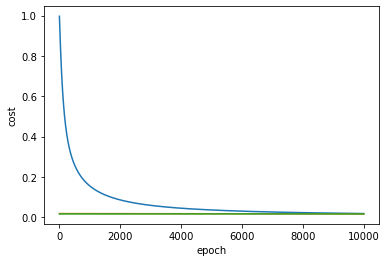

In [31]:
plt.plot(epoch_,cost1)
plt.plot(epoch_,cost2)
plt.plot(epoch_,cost3)
plt.xlabel("epoch")
plt.ylabel("cost")
plt.show()

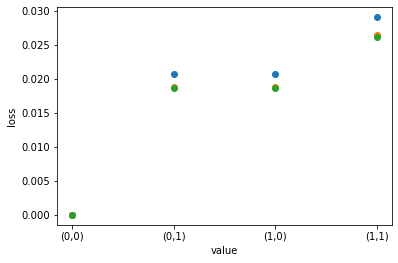

In [26]:
test = ["(0,0)","(0,1)","(1,0)","(1,1)"]
plt.plot(test,loss1,'o')
plt.plot(test,loss2,'o')
plt.plot(test,loss3,'o')
plt.xlabel("value")
plt.ylabel("loss")
plt.show()